# Least square problem for polynomial regression 

## import library

In [1]:
import numpy as np
import matplotlib.image as img
import matplotlib.pyplot as plt
import matplotlib.colors as colors

## load point data 

In [2]:
filename    = 'assignment_05_data.csv'
data        = np.loadtxt(filename, delimiter = ',')

In [3]:
data

array([[-10.      ,  -9.97998 ,  -9.95996 , ...,   9.95996 ,   9.97998 ,
         10.      ],
       [  1.271965,   1.263511,   1.254952, ...,  -0.254952,  -0.263511,
         -0.271965]])

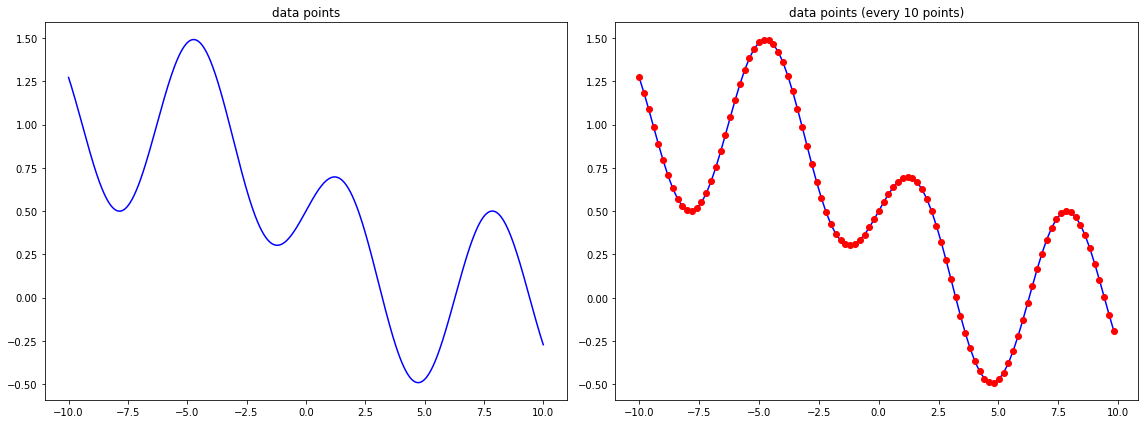

In [4]:
x   = data[0, :]    # independent variable
y   = data[1, :]    # dependent variable

x2  = x[::10]       
y2  = y[::10]

plt.figure(figsize=(16,6))

plt.subplot(121)
plt.plot(x, y, '-', color = 'blue')
plt.title('data points')

plt.subplot(122)
plt.plot(x2, y2, '-', color = 'blue')
plt.plot(x2, y2, 'o', color = 'red')
plt.title('data points (every 10 points)')

plt.tight_layout()
plt.show()

In [5]:
p = x.shape[0]
type(p)
print(p)
x.shape

1000


(1000,)

In [6]:
test = np.array(np.arange(0, 9)).reshape(9, 1)
test

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8]])

In [7]:
a = np.array([ [1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12] ])
print(a)
print(a.shape)
b = np.array([ [1, 2, 3] ]).reshape(3, 1)
c = np.append(a, b, axis = 1)
print(c)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
(3, 4)
[[ 1  2  3  4  1]
 [ 5  6  7  8  2]
 [ 9 10 11 12  3]]


In [8]:
print(c.shape)

print(np.matmul(c.transpose(), c).shape)

(3, 5)
(5, 5)


array([[7., 0., 0.],
       [0., 7., 0.],
       [0., 0., 7.]])

In [ ]:
#
# A : [ x_1^0, x_1^1, ... , x_1^{p-1} ; x_2^0, x_2^1, ... , x_2^{p-1} ; ... ; x_n^0, x_n^1, ... , x_n^{p-1}]
#

In [9]:
a = np.array([ [] ])
k = np.append(a, b, None)
print(b)

test1 = np.power(b, 0)
test2 = np.append(b, test1, axis = 1)
print(test2)

[[1]
 [2]
 [3]]
[[1 1]
 [2 1]
 [3 1]]


In [10]:
# define transpose function
def transposer(x):
    rowNum = x.shape[0]
    x = x.reshape(rowNum, 1)
    return x
print(transposer(x).shape)

(1000, 1)


In [13]:
p = np.array([[1, 2, 3]]).reshape(3, 1)
print(construct_matrix_A(p, 4))

[[ 1  1  1  1]
 [ 1  2  4  8]
 [ 1  3  9 27]]


In [12]:
def construct_matrix_A(x, p):
    x_transposed = transposer(x)
    
    for i in range(p):
        if i == 0:
            A = np.power(x_transposed, i)
        else:
            A = np.append(A, np.power(x_transposed, i), axis = 1)
            
    # use functions including : np.power

    return A

In [ ]:
#
# x : independent variable
# y : dependent variable
# p : power of the polinomial (theta_0 * x^0, theta_1 * x^1, ..., theta_{p-1} * x^{p-1})
# alpha : coefficient for the regularization term : \| theta \|_2^2
#

In [14]:
# define identify matrix function
def identityFunc(originalMatrix):
    colNum = originalMatrix.shape[1]
    identityMatrix = np.identity(colNum)
    return identityMatrix

In [15]:
def solve_polynomial_regression(x, y, p, alpha = 0):
    A = construct_matrix_A(x, p)
    A_transpose = A.transpose()
    # theta * = (AT * A)^-1 * AT * Y
    
    theta_left = np.matmul(A_transpose, A)
    theta_right = np.matmul(A_transpose, y)
    
    optimal_theta = np.linalg.solve(theta_left + (alpha * identityFunc(theta_left)), theta_right)
    
    # use functions including : np.identity, np.matmul, np.linalg.inv 
    
    h = np.matmul(A, optimal_theta)

    return h

In [16]:
h_01        = solve_polynomial_regression(x, y, 1)
h_02        = solve_polynomial_regression(x, y, 2)
h_04        = solve_polynomial_regression(x, y, 4)
h_08        = solve_polynomial_regression(x, y, 8)
h_16        = solve_polynomial_regression(x, y, 16)
h_32        = solve_polynomial_regression(x, y, 32)

h_24_0      = solve_polynomial_regression(x, y, 24, 0)
h_24_00001  = solve_polynomial_regression(x, y, 24, 0.0001)
h_24_0001   = solve_polynomial_regression(x, y, 24, 0.001)
h_24_001    = solve_polynomial_regression(x, y, 24, 0.01)
h_24_01     = solve_polynomial_regression(x, y, 24, 0.1)
h_24_1      = solve_polynomial_regression(x, y, 24, 1)

In [17]:
def plot_polynomial_regression_3x2(x, y, h_01, title_01, h_02, title_02, h_04, title_04, h_08, title_08, h_16, title_16, h_32, title_32):

    plt.figure(figsize=(16,18))

    plt.subplot(321)
    plt.plot(x, y, '-', color='blue')
    plt.plot(x, h_01, '-', color='red')
    plt.title(title_01)

    plt.subplot(322)
    plt.plot(x, y, '-', color='blue')
    plt.plot(x, h_02, '-', color='red')
    plt.title(title_02)

    plt.subplot(323)
    plt.plot(x, y, '-', color='blue')
    plt.plot(x, h_04, '-', color='red')
    plt.title(title_04)

    plt.subplot(324)
    plt.plot(x, y, '-', color='blue')
    plt.plot(x, h_08, '-', color='red')
    plt.title(title_08)

    plt.subplot(325)
    plt.plot(x, y, '-', color='blue')
    plt.plot(x, h_16, '-', color='red')
    plt.title(title_16)

    plt.subplot(326)
    plt.plot(x, y, '-', color='blue')
    plt.plot(x, h_32, '-', color='red')
    plt.title(title_32)

    plt.tight_layout()
    plt.show()

# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *

# * results

# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *

### # 01. plot the input data in blue and the polynomial approximations with varying degrees in red ($p = 1, 2, 4, 8, 16, 32$)

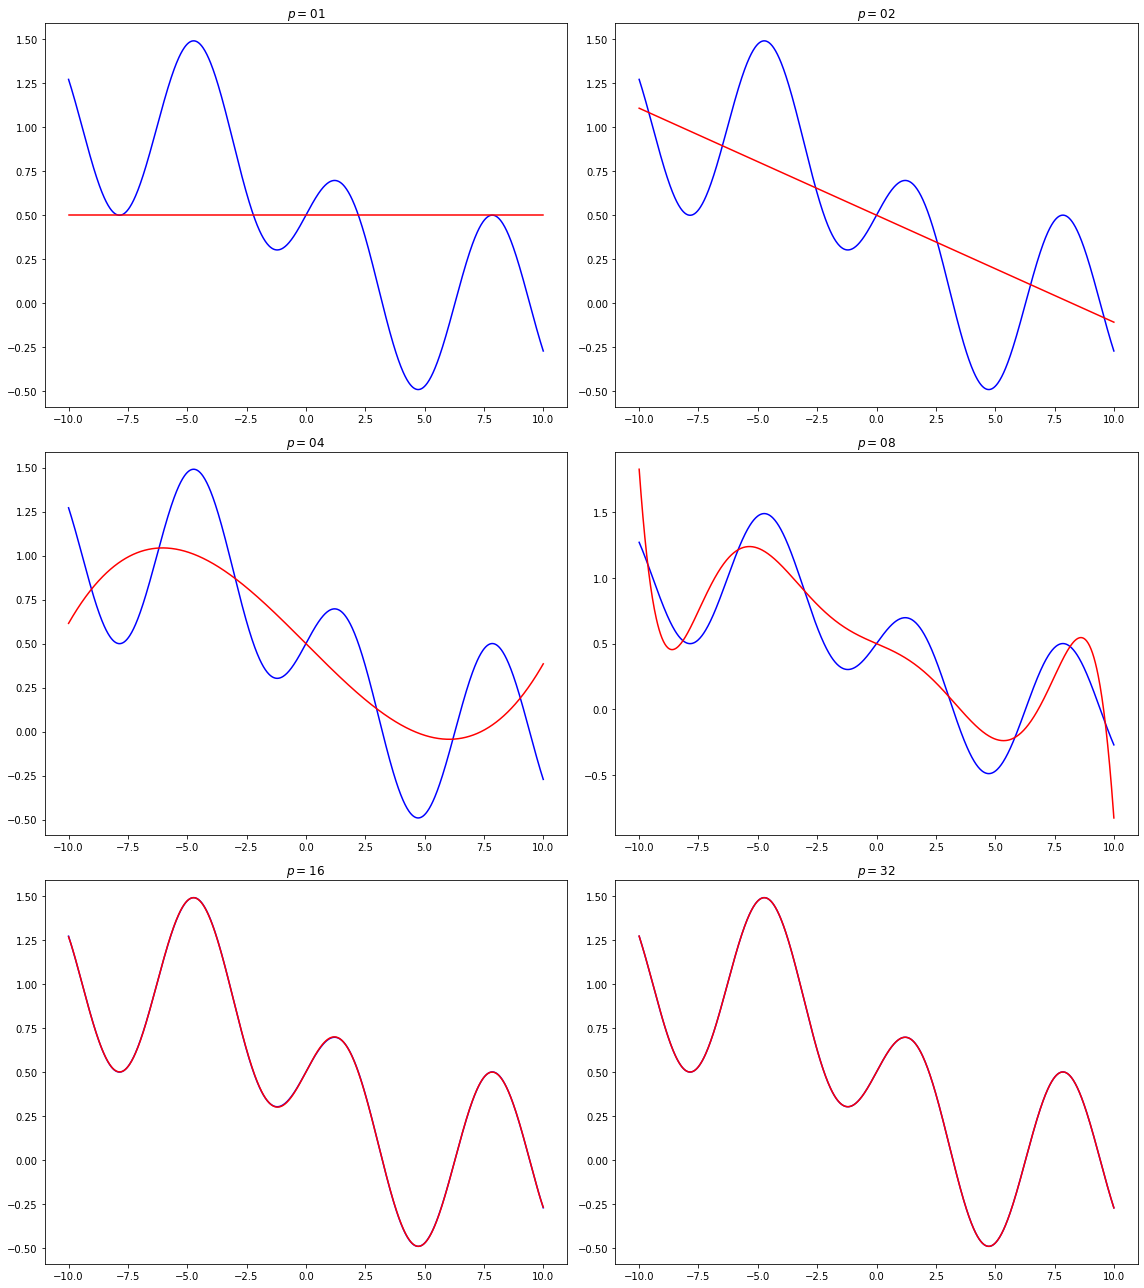

In [18]:
plot_polynomial_regression_3x2(x, y, h_01, '$p = 01$', h_02, '$p = 02$', h_04, '$p = 04$', h_08, '$p = 08$', h_16, '$p = 16$', h_32, '$p = 32$')

### # 02. plot the input data in blue and the polynomial approximations with varying regularization parameters at $p = 24$ ($\alpha = 0, 0.0001, 0.001, 0.01, 0.1, 1$)

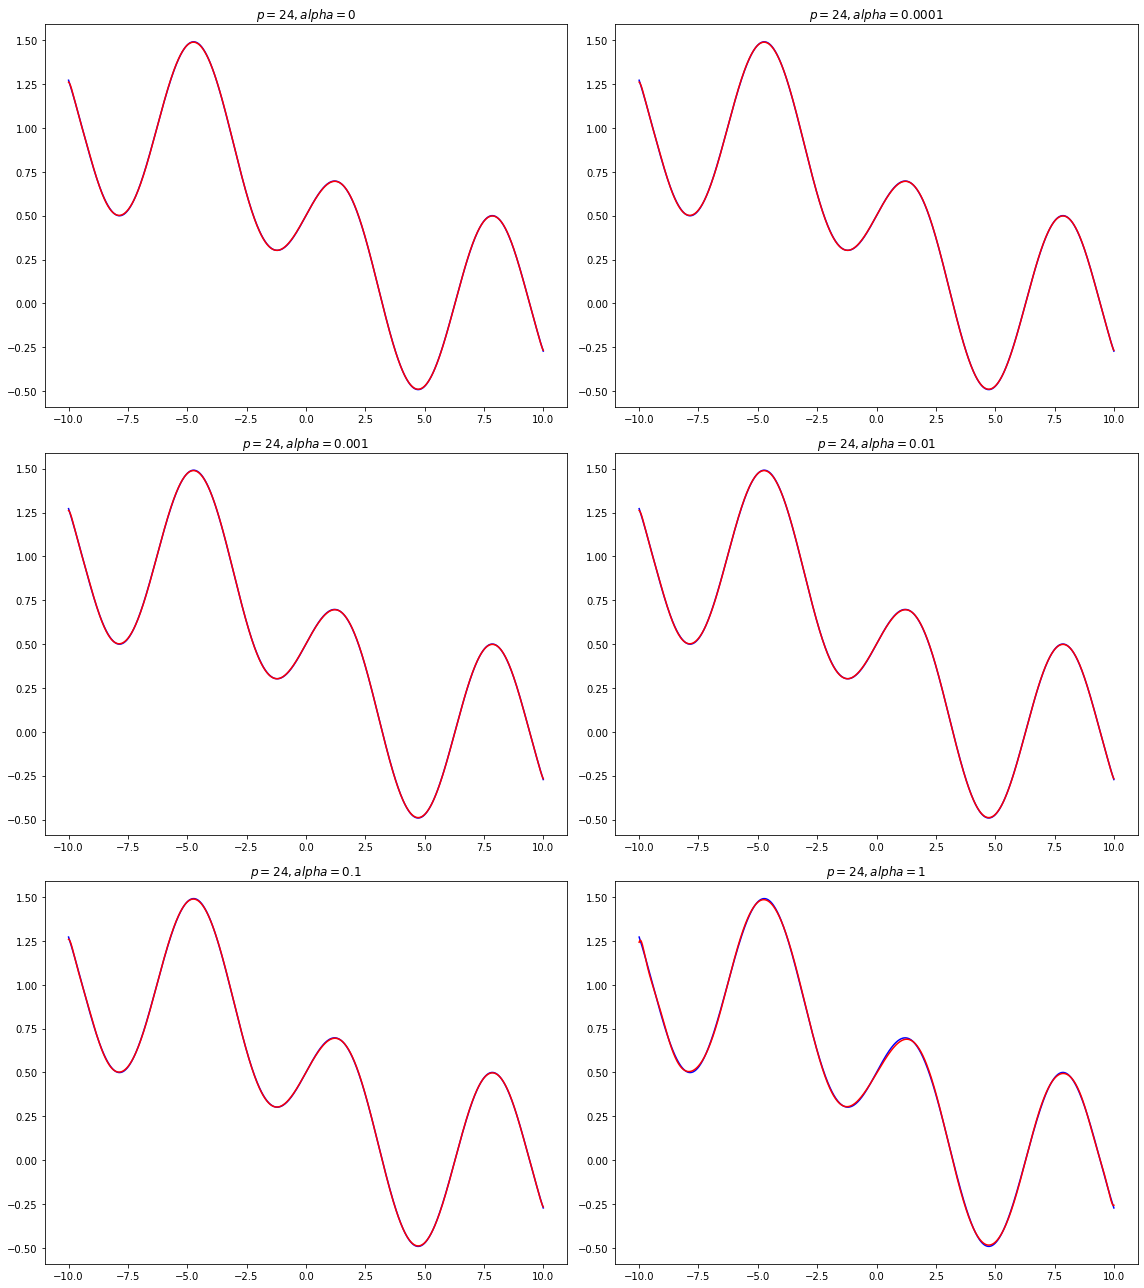

In [19]:
plot_polynomial_regression_3x2(x, y, h_24_0, '$p = 24, alpha = 0$', h_24_00001, '$p = 24, alpha = 0.0001$', h_24_0001, '$p = 24, alpha = 0.001$', h_24_001, '$p = 24, alpha = 0.01$', h_24_01, '$p = 24, alpha = 0.1$', h_24_1, '$p = 24, alpha = 1$')